In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic_train=pd.read_csv('train.csv')

In [ ]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<ipython-input-108-7a9803e09ae2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_train.corr(), cmap=colormap)


<Axes: >

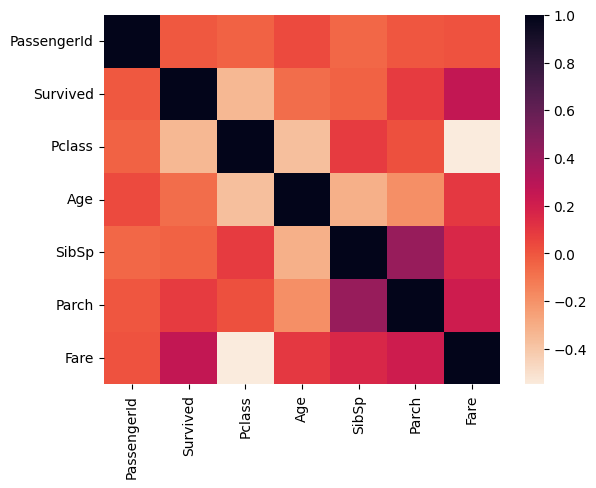

In [ ]:
colormap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(titanic_train.corr(), cmap=colormap)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split= StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_marker,test_marker in split.split(titanic_train,titanic_train[["Survived","Pclass","Sex"]]):
  strat_train_set= titanic_train.loc[train_marker]
  strat_test_set= titanic_train.loc[test_marker]

In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 96 to 174
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [ ]:
# using estimators

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class Age(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    impute = SimpleImputer(strategy="mean")
    X["Age"] = impute.fit_transform(X[['Age']])
    return X

In [ ]:
# using OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

class HotEncoding(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    encode = OneHotEncoder()
    Matrix = encode.fit_transform(X[['Embarked']]).toarray()
    col_name=["C","S","Q","N"]

    for i in range(len(Matrix.T)):
      X[col_name[i]]= Matrix.T[i]

    Matrix = encode.fit_transform(X[['Sex']]).toarray()
    col_name=["Male","Female"]

    for i in range(len(Matrix.T)):
      X[col_name[i]]= Matrix.T[i]
    return X

In [ ]:
# dropping columns

class Drop(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X.drop(["Name","Cabin","Sex","Ticket","Embarked","N"],axis=1, errors="ignore")


In [ ]:
# using the three estimators in the pipeline

from sklearn.pipeline import Pipeline

Pipeline= Pipeline([("age",Age()),("Hotencoder",HotEncoding()),("Drop",Drop())])

strat_train_set=Pipeline.fit_transform(strat_train_set)
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
96,97,0,1,71.000000,0,0,34.6542,1.0,0.0,0.0,0.0,1.0
448,449,1,3,5.000000,2,1,19.2583,1.0,0.0,0.0,1.0,0.0
602,603,0,1,29.743444,0,0,42.4000,0.0,0.0,1.0,0.0,1.0
210,211,0,3,24.000000,0,0,7.0500,0.0,0.0,1.0,0.0,1.0
409,410,0,3,29.743444,3,1,25.4667,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
484,485,1,1,25.000000,1,0,91.0792,1.0,0.0,0.0,0.0,1.0
305,306,1,1,0.920000,1,2,151.5500,0.0,0.0,1.0,0.0,1.0
457,458,1,1,29.743444,1,0,51.8625,0.0,0.0,1.0,1.0,0.0
348,349,1,3,3.000000,1,1,15.9000,0.0,0.0,1.0,0.0,1.0


In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 96 to 174
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Male         712 non-null    float64
 11  Female       712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler

X_train= strat_train_set.drop(['Survived'], axis=1)
y_train= strat_train_set['Survived']
scaler= StandardScaler()
X_data_train= scaler.fit_transform(X)
y_data_train= y.to_numpy()

In [ ]:
# using the randomForest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier= RandomForestClassifier()

param_grid=[{
    "n_estimators": [10,100,200,500,1000],
    "max_depth": [None,5,10],
    "min_samples_split": [2,3,4]
}]
grid_search= GridSearchCV(classifier, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_train, y_data_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_classifier=grid_search.best_estimator_
final_classifier

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=1000)

In [ ]:
strat_test_set= Pipeline.fit_transform(strat_test_set)

In [ ]:
X_test= strat_test_set.drop(['Survived'], axis=1)
y_test= strat_test_set['Survived']
scaler= StandardScaler()
X_data_test= scaler.fit_transform(X)
y_data_test= y.to_numpy()

In [ ]:
final_classifier.score(X_data_test, y_data_test)*100

94.66292134831461